In [1]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [2]:
# temporarily loaded for the creation of a TSV file, although it is not used
# read in the experimental data

experimental_data = {}
experimental_filename = '../../RBFE_validation/NES/H_pocket/star_map/experimental_core1.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'lig_1': {'dG': -8.56, 'ddG': 0.0},
 'lig_2': {'dG': -9.08, 'ddG': 0.0},
 'lig_3': {'dG': -9.85, 'ddG': 0.0},
 'lig_4': {'dG': -9.39, 'ddG': 0.0},
 'lig_5': {'dG': -10.91, 'ddG': 0.0},
 'lig_6': {'dG': -9.64, 'ddG': 0.0},
 'lig_7': {'dG': -10.37, 'ddG': 0.0},
 'lig_8': {'dG': -9.35, 'ddG': 0.0},
 'lig_9': {'dG': -10.17, 'ddG': 0.0}}


In [3]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_step1_representative_NES.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'lig_1->lig_11': {'dG': 0.9899999999999995,
                   'ddG': 0.5102940328869239,
                   'ligand_i': 'lig_1',
                   'ligand_j': 'lig_11'},
 'lig_1->lig_11-0': {'dG': 0.9899999999999995,
                     'ddG': 0.5102940328869239,
                     'ligand_i': 'lig_1',
                     'ligand_j': 'lig_11-0'},
 'lig_1->lig_12': {'dG': 1.2733333333333334,
                   'ddG': 0.3017173069834307,
                   'ligand_i': 'lig_1',
                   'ligand_j': 'lig_12'},
 'lig_1->lig_12-0': {'dG': 1.2733333333333334,
                     'ddG': 0.3017173069834307,
                     'ligand_i': 'lig_1',
                     'ligand_j': 'lig_12-0'},
 'lig_1->lig_13-0': {'dG': 0.956666666666667,
                     'ddG': 0.393234450847498,
                     'ligand_i': 'lig_1',
                     'ligand_j': 'lig_13-0'},
 'lig_1->lig_13-1': {'dG': -2.0666666666666664,
                     'ddG': 0.7226571340084684,
           

In [4]:
cinnabar_filename = './final_results_step1_representative_NES_cin.tsv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


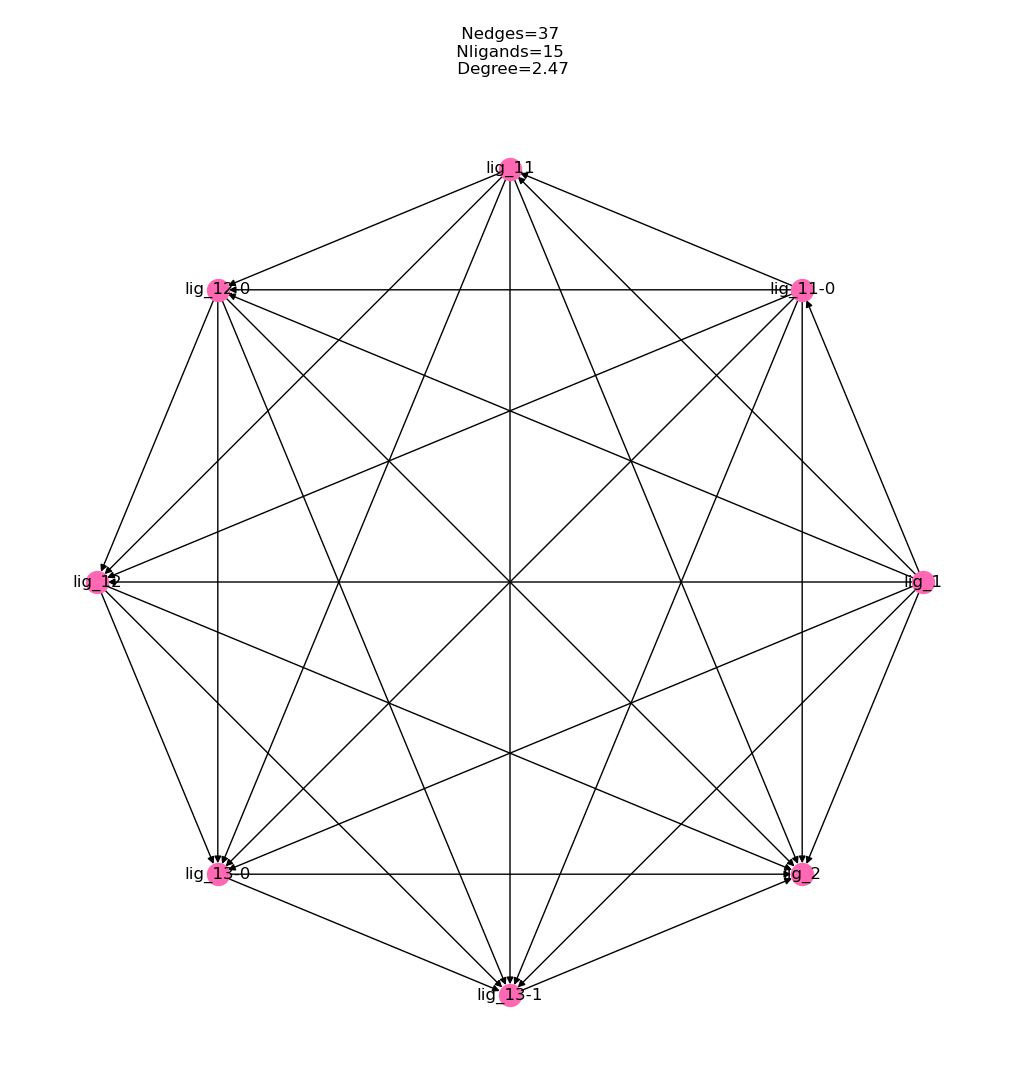

In [5]:
fe = femap.FEMap.from_csv('./final_results_step1_representative_NES_cin.tsv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()
fe.generate_absolute_values()

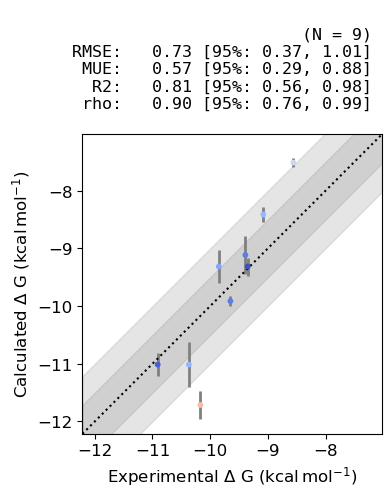

In [12]:
cinnabar_plotting.plot_DGs(fe.to_legacy_graph(), figsize=5, filename='../core1/FEP/star_run3/cinnabar_input_core1_R1_FEP_star_run3.png', shift=shift.m)

In [6]:
dG_results = {}
nodes = list(fe.to_legacy_graph().nodes.data())
print(nodes)


for key in range(len(nodes)):
    dG_results[nodes[key][0]] = {
        #'experimental_estimate': nodes[key][1]['exp_DG'],
        #'experimental_error': nodes[key][1]['exp_dDG'],
        'calculated_estimate': round(nodes[key][1]['calc_DG'],2),
        'calculated_error': round(nodes[key][1]['calc_dDG'],2),
    }

# write out the calculated results
with open('./cinnabar_output_step1_representative_NES.dat', 'w') as f:
    writer = csv.writer(f, delimiter="\t", lineterminator="\n")
    writer.writerow(["ligand", "DG(MLE)", "uncertainty (kcal/mol)",])
    for ligand in dG_results:
        writer.writerow([
            ligand,
            dG_results[ligand]['calculated_estimate']+0.33,
            dG_results[ligand]['calculated_error'],
        ])
        print(dG_results[ligand])

[('lig_1', {'exp_DG': -8.56, 'exp_dDG': 0.0, 'calc_DG': -0.32970106541633465, 'calc_dDG': 0.12608585183366425}), ('lig_11-0', {'calc_DG': 0.426657245113375, 'calc_dDG': 0.15503589818591518}), ('lig_11', {'calc_DG': 0.03962856309730156, 'calc_dDG': 0.13079682859380468}), ('lig_12-0', {'calc_DG': 0.983953848557316, 'calc_dDG': 0.13538426216499705}), ('lig_12', {'calc_DG': 0.5262245811004658, 'calc_dDG': 0.179370598136254}), ('lig_13-0', {'calc_DG': 0.9519333844730276, 'calc_dDG': 0.12970957446834205}), ('lig_13-1', {'calc_DG': -1.744270537508926, 'calc_dDG': 0.22681492448033402}), ('lig_2', {'exp_DG': -9.08, 'exp_dDG': 0.0, 'calc_DG': -0.8544260194162256, 'calc_dDG': 0.11905565407668323})]
{'calculated_estimate': -0.33, 'calculated_error': 0.13}
{'calculated_estimate': 0.43, 'calculated_error': 0.16}
{'calculated_estimate': 0.04, 'calculated_error': 0.13}
{'calculated_estimate': 0.98, 'calculated_error': 0.14}
{'calculated_estimate': 0.53, 'calculated_error': 0.18}
{'calculated_estimate'

In [7]:
import pandas as pd

# タブ区切りのファイルを読み込む
df = pd.read_csv('./cinnabar_output_step1_representative_NES.dat', delimiter='\t')

# 'ligand'カラムから'lig_'を取り除いた新しいカラム'ligand_num'を作成
df['ligand_num'] = df['ligand'].str.replace('lig_', '')

# カンマ区切りのCSVファイルとして保存
df.to_csv('./cinnabar_output_step1_representative_NES.csv', index=False)